In [73]:
# loading library
import pandas as pd

## Creating dataframe and loading the dataset

In [74]:
import pandas as pd
df = pd.read_csv('data.csv')
df

,x1,x2,y
0,0.1,42,20.92
1,0.2,49,30.44
2,0.3,20,9.96
3,0.4,66,36.98
4,0.5,2,0.00
...,...,...,...
95,9.6,60,37.82
96,9.7,11,6.34
97,9.8,38,20.86
98,9.9,80,45.88


## reanaming the columns

In [75]:
df.columns = ['avg rainfall(x1)', 'elevation (x2)', 'flood risk (y)']
df

,avg rainfall(x1),elevation (x2),flood risk (y)
0,0.1,42,20.92
1,0.2,49,30.44
2,0.3,20,9.96
3,0.4,66,36.98
4,0.5,2,0.00
...,...,...,...
95,9.6,60,37.82
96,9.7,11,6.34
97,9.8,38,20.86
98,9.9,80,45.88


In [76]:
df.astype('float').dtypes

avg rainfall(x1)    float64
elevation (x2)      float64
flood risk (y)      float64
dtype: object

## Feature scaling - Normalization

In [77]:
df['normalized_x1'] = (df['avg rainfall(x1)']-min(df['avg rainfall(x1)']))/(max(df['avg rainfall(x1)'])-min(df['avg rainfall(x1)']))

In [78]:
df['normalized_x2'] = (df['elevation (x2)']-min(df['elevation (x2)']))/(max(df['elevation (x2)'])-min(df['elevation (x2)']))

In [79]:
df['normalized_y'] = (df['flood risk (y)']-min(df['flood risk (y)']))/(max(df['flood risk (y)'])-min(df['flood risk (y)']))

In [80]:
df

,avg rainfall(x1),elevation (x2),flood risk (y),normalized_x1,normalized_x2,normalized_y
0,0.1,42,20.92,0.000000,0.424242,0.375314
1,0.2,49,30.44,0.010101,0.494949,0.546107
2,0.3,20,9.96,0.020202,0.202020,0.178687
3,0.4,66,36.98,0.030303,0.666667,0.663437
4,0.5,2,0.00,0.040404,0.020202,0.000000
...,...,...,...,...,...,...
95,9.6,60,37.82,0.959596,0.606061,0.678507
96,9.7,11,6.34,0.969697,0.111111,0.113742
97,9.8,38,20.86,0.979798,0.383838,0.374238
98,9.9,80,45.88,0.989899,0.808081,0.823107


## Normalizing the anomaly in data

In [81]:
df['anom.norm.avg_rain(x1)'] = df['normalized_x1'] - df['normalized_x1'].mean()
df['anom.norm.ele(x2)'] = df['normalized_x2'] - df['normalized_x2'].mean()
df['anom.norm.flood(y)'] = df['normalized_y'] - df['normalized_y'].mean()
df

,avg rainfall(x1),elevation (x2),flood risk (y),normalized_x1,normalized_x2,normalized_y,anom.norm.avg_rain(x1),anom.norm.ele(x2),anom.norm.flood(y)
0,0.1,42,20.92,0.000000,0.424242,0.375314,-0.500000,-0.092121,-0.155544
1,0.2,49,30.44,0.010101,0.494949,0.546107,-0.489899,-0.021414,0.015249
2,0.3,20,9.96,0.020202,0.202020,0.178687,-0.479798,-0.314343,-0.352171
3,0.4,66,36.98,0.030303,0.666667,0.663437,-0.469697,0.150303,0.132580
4,0.5,2,0.00,0.040404,0.020202,0.000000,-0.459596,-0.496162,-0.530858
...,...,...,...,...,...,...,...,...,...
95,9.6,60,37.82,0.959596,0.606061,0.678507,0.459596,0.089697,0.147650
96,9.7,11,6.34,0.969697,0.111111,0.113742,0.469697,-0.405253,-0.417115
97,9.8,38,20.86,0.979798,0.383838,0.374238,0.479798,-0.132525,-0.156620
98,9.9,80,45.88,0.989899,0.808081,0.823107,0.489899,0.291717,0.292250


C:\Users\vinee\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='anom.norm.avg_rain(x1)', ylabel='anom.norm.flood(y)'>

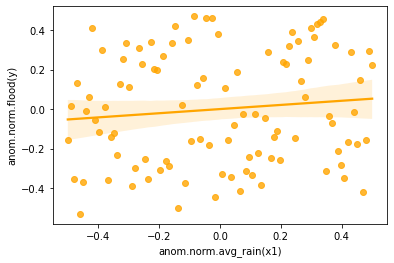

In [175]:
sns.regplot(df['anom.norm.avg_rain(x1)'], df['anom.norm.flood(y)'], color='orange')

C:\Users\vinee\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='anom.norm.ele(x2)', ylabel='anom.norm.flood(y)'>

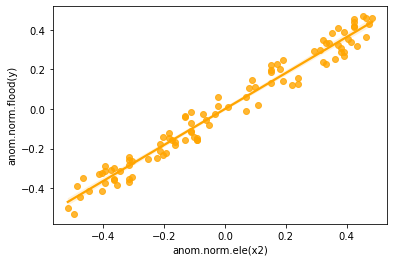

In [176]:
sns.regplot(df['anom.norm.ele(x2)'], df['anom.norm.flood(y)'], color='orange')

## Correlation

In [82]:
df.corr(method='pearson')

,avg rainfall(x1),elevation (x2),flood risk (y),normalized_x1,normalized_x2,normalized_y,anom.norm.avg_rain(x1),anom.norm.ele(x2),anom.norm.flood(y)
avg rainfall(x1),1.000000,0.065063,0.108915,1.000000,0.065063,0.108915,1.000000,0.065063,0.108915
elevation (x2),0.065063,1.000000,0.983691,0.065063,1.000000,0.983691,0.065063,1.000000,0.983691
flood risk (y),0.108915,0.983691,1.000000,0.108915,0.983691,1.000000,0.108915,0.983691,1.000000
normalized_x1,1.000000,0.065063,0.108915,1.000000,0.065063,0.108915,1.000000,0.065063,0.108915
normalized_x2,0.065063,1.000000,0.983691,0.065063,1.000000,0.983691,0.065063,1.000000,0.983691
normalized_y,0.108915,0.983691,1.000000,0.108915,0.983691,1.000000,0.108915,0.983691,1.000000
anom.norm.avg_rain(x1),1.000000,0.065063,0.108915,1.000000,0.065063,0.108915,1.000000,0.065063,0.108915
anom.norm.ele(x2),0.065063,1.000000,0.983691,0.065063,1.000000,0.983691,0.065063,1.000000,0.983691
anom.norm.flood(y),0.108915,0.983691,1.000000,0.108915,0.983691,1.000000,0.108915,0.983691,1.000000


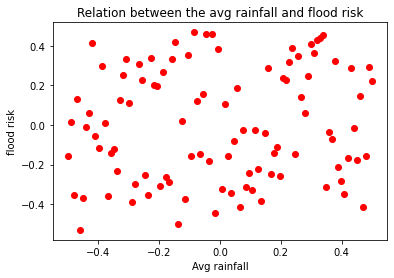

In [170]:
import matplotlib.pyplot as plt

plt.scatter(df['anom.norm.avg_rain(x1)'], df['anom.norm.flood(y)'], color='red')
plt.xlabel('Avg rainfall')
plt.ylabel('flood risk')
plt.title('Relation between the avg rainfall and flood risk');

## WEak correlation

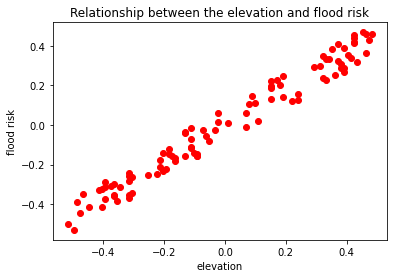

In [171]:
plt.scatter(df['anom.norm.ele(x2)'], df['anom.norm.flood(y)'], color = 'red')
plt.xlabel('elevation')
plt.ylabel('flood risk')
plt.title('Relationship between the elevation and flood risk');

## HIghly correlated

C:\Users\vinee\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='anom.norm.avg_rain(x1)', ylabel='anom.norm.flood(y)'>

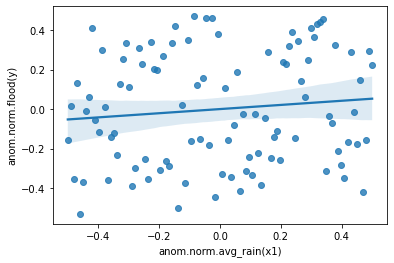

In [138]:
import seaborn as sns

sns.regplot(df['anom.norm.avg_rain(x1)'], df['anom.norm.flood(y)'])


C:\Users\vinee\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='anom.norm.ele(x2)', ylabel='anom.norm.flood(y)'>

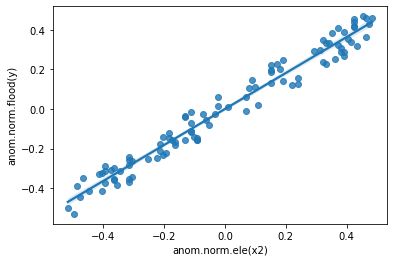

In [137]:
sns.regplot(df['anom.norm.ele(x2)'], df['anom.norm.flood(y)'])

C:\Users\vinee\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


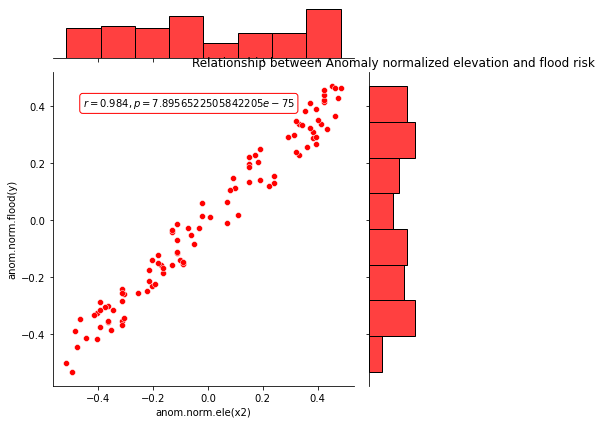

In [187]:
# Using the jointplot() function in the seaborn library for printing the 
# jointplot between the area-income and the age columns of the advertisement.
# the Area Income is plotted on the x-axis and the Age is plotted against it
# on the y-axis, and the dataframe to be used is also passed as the 3rd argument
# and the color is mentioned as red under the color parameter.

# VINEETA GUPTA
g = sns.jointplot( df['anom.norm.ele(x2)'],
                   df['anom.norm.flood(y)'], 
                   data=df, 
                   color='red')

# Storing the pearson coefficient and the p-value in the r and p variables
# respectively. To do this the stats module has been used from the scipy library.
# and the pearsonr() is used to compute the pearson's coefficient between Area
# Income and the Age.
from scipy import  stats
r,p=stats.pearsonr( df['anom.norm.flood(y)'], df['anom.norm.ele(x2)'])

# Annoting the graph with the coefficient and p-value by using this function.
# It is done by manually printing the r and p from above.
# And specifying the coordinate position in the xy parameter to position r and p
# in the graph at a specific position. 

g.ax_joint.annotate(f'$r = {r:.3f}, p = {p:}$',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'white', 'ec': 'red'})

plt.tight_layout()
plt.title('Relationship between Anomaly normalized elevation and flood risk')
plt.show()

C:\Users\vinee\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


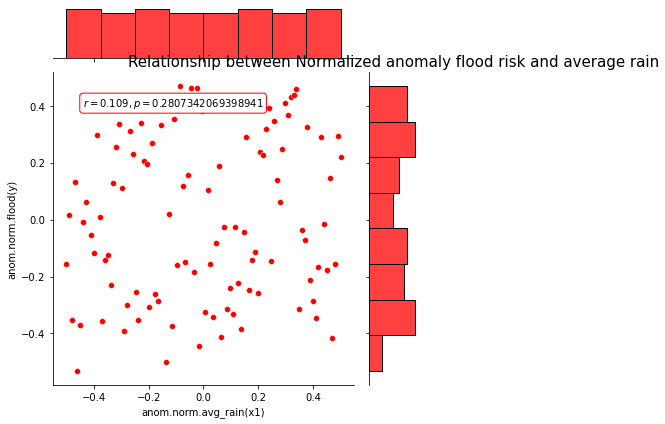

In [191]:
g = sns.jointplot( df['anom.norm.avg_rain(x1)'],
                   df['anom.norm.flood(y)'], 
                   data=df, 
                   color='red')

# Storing the pearson coefficient and the p-value in the r and p variables
# respectively. To do this the stats module has been used from the scipy library.
# and the pearsonr() is used to compute the pearson's coefficient between Area
# Income and the Age.
from scipy import  stats

r,p=stats.pearsonr( df['anom.norm.avg_rain(x1)'],
                   df['anom.norm.flood(y)'])

# Annoting the graph with the coefficient and p-value by using this function.
# It is done by manually printing the r and p from above.
# And specifying the coordinate position in the xy parameter to position r and p
# in the graph at a specific position. 

g.ax_joint.annotate(f'$r = {r:.3f}, p = {p:}$',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'white', 'ec': 'red'})

plt.tight_layout()
plt.title("Relationship between Normalized anomaly flood risk and average rain", size=15)
plt.show()

## Calculating the parameters for regression line 

In [85]:
yX1 = df['anom.norm.avg_rain(x1)']*df['anom.norm.flood(y)']
#df.append(yX1, ignore_index=True)
df['yX1'] = yX1
df.head()

,avg rainfall(x1),elevation (x2),flood risk (y),normalized_x1,normalized_x2,normalized_y,anom.norm.avg_rain(x1),anom.norm.ele(x2),anom.norm.flood(y),yX1
0,0.1,42,20.92,0.000000,0.424242,0.375314,-0.500000,-0.092121,-0.155544,0.077772
1,0.2,49,30.44,0.010101,0.494949,0.546107,-0.489899,-0.021414,0.015249,-0.007471
2,0.3,20,9.96,0.020202,0.202020,0.178687,-0.479798,-0.314343,-0.352171,0.168971
3,0.4,66,36.98,0.030303,0.666667,0.663437,-0.469697,0.150303,0.132580,-0.062272
4,0.5,2,0.00,0.040404,0.020202,0.000000,-0.459596,-0.496162,-0.530858,0.243980


In [86]:
yX2 = df['anom.norm.ele(x2)']*df['anom.norm.flood(y)']
df['yX2'] = yX2
df.head()

,avg rainfall(x1),elevation (x2),flood risk (y),normalized_x1,normalized_x2,normalized_y,anom.norm.avg_rain(x1),anom.norm.ele(x2),anom.norm.flood(y),yX1,yX2
0,0.1,42,20.92,0.000000,0.424242,0.375314,-0.500000,-0.092121,-0.155544,0.077772,0.014329
1,0.2,49,30.44,0.010101,0.494949,0.546107,-0.489899,-0.021414,0.015249,-0.007471,-0.000327
2,0.3,20,9.96,0.020202,0.202020,0.178687,-0.479798,-0.314343,-0.352171,0.168971,0.110703
3,0.4,66,36.98,0.030303,0.666667,0.663437,-0.469697,0.150303,0.132580,-0.062272,0.019927
4,0.5,2,0.00,0.040404,0.020202,0.000000,-0.459596,-0.496162,-0.530858,0.243980,0.263391


In [87]:
X1X2 = df['anom.norm.avg_rain(x1)']*df['anom.norm.ele(x2)']
df['X1X2'] = X1X2
df.head()

,avg rainfall(x1),elevation (x2),flood risk (y),normalized_x1,normalized_x2,normalized_y,anom.norm.avg_rain(x1),anom.norm.ele(x2),anom.norm.flood(y),yX1,yX2,X1X2
0,0.1,42,20.92,0.000000,0.424242,0.375314,-0.500000,-0.092121,-0.155544,0.077772,0.014329,0.046061
1,0.2,49,30.44,0.010101,0.494949,0.546107,-0.489899,-0.021414,0.015249,-0.007471,-0.000327,0.010491
2,0.3,20,9.96,0.020202,0.202020,0.178687,-0.479798,-0.314343,-0.352171,0.168971,0.110703,0.150821
3,0.4,66,36.98,0.030303,0.666667,0.663437,-0.469697,0.150303,0.132580,-0.062272,0.019927,-0.070597
4,0.5,2,0.00,0.040404,0.020202,0.000000,-0.459596,-0.496162,-0.530858,0.243980,0.263391,0.228034


In [88]:
X1_sq = df['anom.norm.avg_rain(x1)']*df['anom.norm.avg_rain(x1)']
df['X1_sq'] = X1_sq
df.head()

,avg rainfall(x1),elevation (x2),flood risk (y),normalized_x1,normalized_x2,normalized_y,anom.norm.avg_rain(x1),anom.norm.ele(x2),anom.norm.flood(y),yX1,yX2,X1X2,X1_sq
0,0.1,42,20.92,0.000000,0.424242,0.375314,-0.500000,-0.092121,-0.155544,0.077772,0.014329,0.046061,0.250000
1,0.2,49,30.44,0.010101,0.494949,0.546107,-0.489899,-0.021414,0.015249,-0.007471,-0.000327,0.010491,0.240001
2,0.3,20,9.96,0.020202,0.202020,0.178687,-0.479798,-0.314343,-0.352171,0.168971,0.110703,0.150821,0.230206
3,0.4,66,36.98,0.030303,0.666667,0.663437,-0.469697,0.150303,0.132580,-0.062272,0.019927,-0.070597,0.220615
4,0.5,2,0.00,0.040404,0.020202,0.000000,-0.459596,-0.496162,-0.530858,0.243980,0.263391,0.228034,0.211228


In [89]:
X2_sq = df['anom.norm.ele(x2)']*df['anom.norm.ele(x2)']
df['X2_sq'] = X2_sq
df.head()

,avg rainfall(x1),elevation (x2),flood risk (y),normalized_x1,normalized_x2,normalized_y,anom.norm.avg_rain(x1),anom.norm.ele(x2),anom.norm.flood(y),yX1,yX2,X1X2,X1_sq,X2_sq
0,0.1,42,20.92,0.000000,0.424242,0.375314,-0.500000,-0.092121,-0.155544,0.077772,0.014329,0.046061,0.250000,0.008486
1,0.2,49,30.44,0.010101,0.494949,0.546107,-0.489899,-0.021414,0.015249,-0.007471,-0.000327,0.010491,0.240001,0.000459
2,0.3,20,9.96,0.020202,0.202020,0.178687,-0.479798,-0.314343,-0.352171,0.168971,0.110703,0.150821,0.230206,0.098812
3,0.4,66,36.98,0.030303,0.666667,0.663437,-0.469697,0.150303,0.132580,-0.062272,0.019927,-0.070597,0.220615,0.022591
4,0.5,2,0.00,0.040404,0.020202,0.000000,-0.459596,-0.496162,-0.530858,0.243980,0.263391,0.228034,0.211228,0.246176


In [90]:
df['X1_sq'].sum()

8.501683501683504

In [91]:
# x1 square
x1 = df['anom.norm.avg_rain(x1)'].sum()
x1*x1

5.4357446750385345e-30

In [92]:
x1_sq = df['X1_sq'].sum() - (x1*x1) /len(df)
x1_sq

8.501683501683504

In [93]:
import math
x1_root = math.sqrt(x1_sq)
x1_root

2.9157646512850626

In [94]:
df['X2_sq'].sum()

9.233808795020918

In [95]:
#x2 square
x2 = df['anom.norm.ele(x2)'].sum()
x2*x2

1.176894188928241e-27

In [96]:

x2_square =df['X2_sq'].sum()- (x2*x2)/len(df)
x2_square

9.233808795020918

In [97]:
x2_root=math.sqrt(x2_square)
x2_root

3.0387182816149507

In [98]:
df['yX1'].sum()

0.8931257316617924

In [99]:
x1 = df['anom.norm.avg_rain(x1)'].sum()
x1

2.3314683517128287e-15

In [100]:
y = df['anom.norm.flood(y)'].sum()
y

1.7208456881689926e-14

In [101]:
#summation of x1Y
x1y = df['yX1'].sum() - (x1*y)/len(df)
x1y

0.8931257316617924

In [102]:
df['yX2'].sum()

8.406606430287807

In [103]:
x2 = df['anom.norm.ele(x2)'].sum()
x2

3.430589146091734e-14

In [104]:
# summation of x2y
x2y = df['yX2'].sum() - (x2*y)/len(df)
x2y

8.406606430287807

In [105]:
x1x2 = df['anom.norm.avg_rain(x1)']*df['anom.norm.ele(x2)']
x1x2.sum()

0.5764717885930007

In [106]:
# summation of x1x2
x1x2_summation =x1x2.sum() - ((df['anom.norm.avg_rain(x1)'].sum())*(df['anom.norm.ele(x2)'].sum()))/len(df)
x1x2_summation

0.5764717885930007

# b1 = 0.0435, 1st coeffients of the best fit line

In [107]:
#b1
b1 = ((x2_square*x1y) - (x1x2_summation*x2y))/((x1_sq*x2_square)-(x1x2_summation*x1x2_summation))
b1

0.04350460126869971

# b2 = 0.908, 2nd coefficient of the best fitting line

In [108]:
#b2
b2 = ((x1_sq*x2y)- (x1x2_summation*x1y))/((x1_sq*x2_square)-(x1x2_summation*x1x2_summation))
b2

0.907699892973951

In [146]:
avg_X1 = df['anom.norm.avg_rain(x1)'].sum()/100
avg_X1

2.3314683517128286e-17

In [110]:
avg_X2 = df['anom.norm.ele(x2)'].sum()/100
avg_X2

3.4305891460917336e-16

In [160]:
avg_y = df['anom.norm.flood(y)'].sum()/100
avg_y

1.7208456881689927e-16

# Intercept, b0 = -1.403

In [158]:
b0 = avg_y - b1*avg_X1 - b2*avg_X2
b0


-1.403242672677258e-16

# y = -1.403 + 0.435x1 + 0.908x2 -> Best fit line

In [113]:
# equation of the final line
y_hat = b0+b1*x1_root+b2*x2_root
y_hat

2.885093437547405

In [114]:
df.head()

,avg rainfall(x1),elevation (x2),flood risk (y),normalized_x1,normalized_x2,normalized_y,anom.norm.avg_rain(x1),anom.norm.ele(x2),anom.norm.flood(y),yX1,yX2,X1X2,X1_sq,X2_sq
0,0.1,42,20.92,0.000000,0.424242,0.375314,-0.500000,-0.092121,-0.155544,0.077772,0.014329,0.046061,0.250000,0.008486
1,0.2,49,30.44,0.010101,0.494949,0.546107,-0.489899,-0.021414,0.015249,-0.007471,-0.000327,0.010491,0.240001,0.000459
2,0.3,20,9.96,0.020202,0.202020,0.178687,-0.479798,-0.314343,-0.352171,0.168971,0.110703,0.150821,0.230206,0.098812
3,0.4,66,36.98,0.030303,0.666667,0.663437,-0.469697,0.150303,0.132580,-0.062272,0.019927,-0.070597,0.220615,0.022591
4,0.5,2,0.00,0.040404,0.020202,0.000000,-0.459596,-0.496162,-0.530858,0.243980,0.263391,0.228034,0.211228,0.246176


In [129]:
df['y_pred'] = b0 + b1*df['anom.norm.avg_rain(x1)'] + b2*df['anom.norm.ele(x2)']
df 

,avg rainfall(x1),elevation (x2),flood risk (y),normalized_x1,normalized_x2,normalized_y,anom.norm.avg_rain(x1),anom.norm.ele(x2),anom.norm.flood(y),yX1,yX2,X1X2,X1_sq,X2_sq,y_pred
0,0.1,42,20.92,0.000000,0.424242,0.375314,-0.500000,-0.092121,-0.155544,0.077772,0.014329,0.046061,0.250000,0.008486,-0.105371
1,0.2,49,30.44,0.010101,0.494949,0.546107,-0.489899,-0.021414,0.015249,-0.007471,-0.000327,0.010491,0.240001,0.000459,-0.040750
2,0.3,20,9.96,0.020202,0.202020,0.178687,-0.479798,-0.314343,-0.352171,0.168971,0.110703,0.150821,0.230206,0.098812,-0.306203
3,0.4,66,36.98,0.030303,0.666667,0.663437,-0.469697,0.150303,0.132580,-0.062272,0.019927,-0.070597,0.220615,0.022591,0.115996
4,0.5,2,0.00,0.040404,0.020202,0.000000,-0.459596,-0.496162,-0.530858,0.243980,0.263391,0.228034,0.211228,0.246176,-0.470360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9.6,60,37.82,0.959596,0.606061,0.678507,0.459596,0.089697,0.147650,0.067859,0.013244,0.041224,0.211228,0.008046,0.101412
96,9.7,11,6.34,0.969697,0.111111,0.113742,0.469697,-0.405253,-0.417115,-0.195918,0.169037,-0.190346,0.220615,0.164230,-0.347414
97,9.8,38,20.86,0.979798,0.383838,0.374238,0.479798,-0.132525,-0.156620,-0.075146,0.020756,-0.063585,0.230206,0.017563,-0.099420
98,9.9,80,45.88,0.989899,0.808081,0.823107,0.489899,0.291717,0.292250,0.143173,0.085254,0.142912,0.240001,0.085099,0.286105


# Residual

In [194]:
df['residue'] = (df['anom.norm.flood(y)']-df['y_pred'])**2
df

,avg rainfall(x1),elevation (x2),flood risk (y),normalized_x1,normalized_x2,normalized_y,anom.norm.avg_rain(x1),anom.norm.ele(x2),anom.norm.flood(y),yX1,yX2,X1X2,X1_sq,X2_sq,y_pred,residue
0,0.1,42,20.92,0.000000,0.424242,0.375314,-0.500000,-0.092121,-0.155544,0.077772,0.014329,0.046061,0.250000,0.008486,-0.105371,0.002517
1,0.2,49,30.44,0.010101,0.494949,0.546107,-0.489899,-0.021414,0.015249,-0.007471,-0.000327,0.010491,0.240001,0.000459,-0.040750,0.003136
2,0.3,20,9.96,0.020202,0.202020,0.178687,-0.479798,-0.314343,-0.352171,0.168971,0.110703,0.150821,0.230206,0.098812,-0.306203,0.002113
3,0.4,66,36.98,0.030303,0.666667,0.663437,-0.469697,0.150303,0.132580,-0.062272,0.019927,-0.070597,0.220615,0.022591,0.115996,0.000275
4,0.5,2,0.00,0.040404,0.020202,0.000000,-0.459596,-0.496162,-0.530858,0.243980,0.263391,0.228034,0.211228,0.246176,-0.470360,0.003660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9.6,60,37.82,0.959596,0.606061,0.678507,0.459596,0.089697,0.147650,0.067859,0.013244,0.041224,0.211228,0.008046,0.101412,0.002138
96,9.7,11,6.34,0.969697,0.111111,0.113742,0.469697,-0.405253,-0.417115,-0.195918,0.169037,-0.190346,0.220615,0.164230,-0.347414,0.004858
97,9.8,38,20.86,0.979798,0.383838,0.374238,0.479798,-0.132525,-0.156620,-0.075146,0.020756,-0.063585,0.230206,0.017563,-0.099420,0.003272
98,9.9,80,45.88,0.989899,0.808081,0.823107,0.489899,0.291717,0.292250,0.143173,0.085254,0.142912,0.240001,0.085099,0.286105,0.000038


In [161]:
residual = sum(((df['anom.norm.flood(y)']-df['y_pred'])**2))/len(df)
residual

0.002398622932426294

In [195]:
# (0,0)
y = -1.403 + 0.435*x1 + 0.908*x2
y = -1.403 + 0.435*0 + 0.908*0
y

-1.403

In [196]:
# (0,1)
y = -1.403 + 0.435*x1 + 0.908*x2
y = -1.403 + 0.435*0 + 0.908*1
y

-0.495

In [197]:
# (1,0)
y = -1.403 + 0.435*x1 + 0.908*x2
y = -1.403 + 0.435*1 + 0.908*0
y

-0.968

In [198]:
# (1,1)
y = -1.403 + 0.435*x1 + 0.908*x2
y = -1.403 + 0.435*1 + 0.908*1
y

-0.05999999999999994

## Since the residual is very low, it is a good fit for our model.

# Cross - checking the model with Python Sklearn library. 

In [115]:
from sklearn.linear_model import LinearRegression

In [116]:
df.head()

,avg rainfall(x1),elevation (x2),flood risk (y),normalized_x1,normalized_x2,normalized_y,anom.norm.avg_rain(x1),anom.norm.ele(x2),anom.norm.flood(y),yX1,yX2,X1X2,X1_sq,X2_sq
0,0.1,42,20.92,0.000000,0.424242,0.375314,-0.500000,-0.092121,-0.155544,0.077772,0.014329,0.046061,0.250000,0.008486
1,0.2,49,30.44,0.010101,0.494949,0.546107,-0.489899,-0.021414,0.015249,-0.007471,-0.000327,0.010491,0.240001,0.000459
2,0.3,20,9.96,0.020202,0.202020,0.178687,-0.479798,-0.314343,-0.352171,0.168971,0.110703,0.150821,0.230206,0.098812
3,0.4,66,36.98,0.030303,0.666667,0.663437,-0.469697,0.150303,0.132580,-0.062272,0.019927,-0.070597,0.220615,0.022591
4,0.5,2,0.00,0.040404,0.020202,0.000000,-0.459596,-0.496162,-0.530858,0.243980,0.263391,0.228034,0.211228,0.246176


In [162]:
X = (df[["anom.norm.avg_rain(x1)","anom.norm.ele(x2)"]])
y = df['anom.norm.flood(y)']

In [163]:
# instatiating an object for linear regression
model = LinearRegression()

# fitting our training data 
model.fit(X, y)

LinearRegression()

In [164]:
# computing the accuracy
model.score(X,y)

0.9696737424317305

In [165]:
model.intercept_

-1.4032426726772585e-16

In [166]:
model.coef_

array([0.0435046 , 0.90769989])

In [167]:
model.predict([[4,120]])

C:\Users\vinee\miniconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([109.09800556])

In [168]:
X.dtypes

anom.norm.avg_rain(x1)    float64
anom.norm.ele(x2)         float64
dtype: object

In [169]:
model.predict(X)

array([-0.10537072, -0.04075047, -0.30620292,  0.11599607, -0.47036038,
       -0.3048846 ,  0.0439649 ,  0.04440434,  0.36574778, -0.07390969,
       -0.11931368,  0.26621056, -0.00841057, -0.34721251, -0.20007409,
       -0.18129728, -0.19919521,  0.2046664 ,  0.31513007,  0.28806346,
        0.07762312, -0.45372121, -0.34325754,  0.33566465,  0.29026066,
       -0.24108368, -0.34149978,  0.36492847,  0.15448813,  0.12742152,
       -0.3489107 ,  0.34834886, -0.28385102, -0.36592975,  0.30382375,
        0.37761267, -0.47463566,  0.0942623 , -0.36373255,  0.36103306,
       -0.16114258,  0.40775537,  0.19731504, -0.16899295,  0.21653129,
        0.41868182, -0.14933726,  0.43789807, -0.43268763,  0.31958404,
       -0.36762795,  0.0729084 , -0.08251981, -0.27462277, -0.04496619,
        0.13884697, -0.40166605, -0.0253105 , -0.35494374, -0.28115482,
       -0.37240224, -0.06022748, -0.16981227, -0.3160718 , -0.11392127,
        0.35412114, -0.19556056, -0.08509689, -0.09382614, -0.27

# --------------------------------------------------------